In [1]:
import time
import matplotlib.pyplot as plt
import torch

from pytorch3d.structures import (
    Pointclouds,
    Meshes,
)

import torch
from pytorch3d.ops import sample_points_from_meshes
from pytorch3d.io import load_obj
from pytorch3d.structures import (
    Pointclouds,
    Meshes,
)
from pytorch3d.renderer import TexturesVertex
from src.render.points_renderer import PointsRenderer
from src.render.pulsar_renderer import PulsarRenderer
from src.config import get_parser
from src.blueprint_sampler import BlueprintSampler
from src.util import grid_to_list

In [2]:
# Set the cuda device
device = torch.device("cuda:0")
torch.cuda.set_device(device)

bs = 8
    
config = get_parser().parse_args(args=[])

config.raster_image_size = 128

blueprintSampler = BlueprintSampler(config)
points, normals = blueprintSampler(bs)
points = grid_to_list(points).to(device)
normals = grid_to_list(normals).to(device)
points.shape, normals.shape

(torch.Size([8, 65536, 3]), torch.Size([8, 65536, 3]))

In [3]:
R = PointsRenderer(config)


R.setup(device)

0.48883557319641113


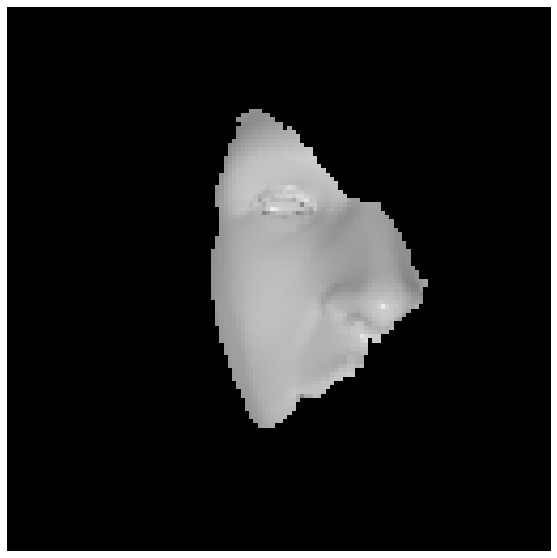

In [4]:
start_time = time.time()
images = R(points, normals=normals)
print(time.time() - start_time)

plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.grid("off")
plt.axis("off");

In [ ]:
P = PulsarRenderer(config)
P.setup(device)

0.03096461296081543


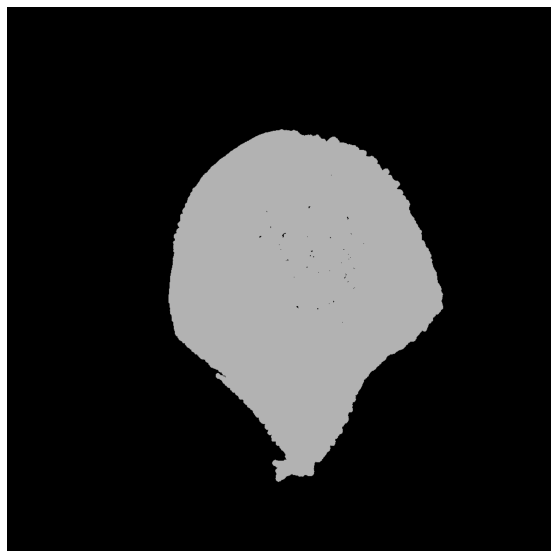

In [42]:
start_time = time.time()
images = P(points)
print(time.time() - start_time)

plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.grid("off")
plt.axis("off");

In [27]:
config.data_patch_size,  config.raster_image_size

(256, 128)